In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Regressão Linear Simples

A Regressão Linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras). 

A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

Existem dois tipos principais de regressão linear:

**Regressão Linear Simples**: Neste caso, há apenas uma variável independente envolvida. A equação da Regressão Linear Simples é expressa como:

Y = a + bX + ε

Onde Y é a variável dependente, X é a variável independente, a é o coeficiente linear (intercepto), b é o coeficiente angular (inclinação) e ε é o erro aleatório.

**Regressão Linear Múltipla**: Neste caso, há duas ou mais variáveis independentes envolvidas. A equação é expressa como:

Y = a + b1X1 + b2X2 + ... + bnXn + ε

Onde Y é a variável dependente, X1, X2, ..., Xn são as variáveis independentes, a é o coeficiente linear (intercepto), b1, b2, ..., bn são os coeficientes angulares (inclinações) e ε é o erro aleatório.

A Regressão Linear é amplamente utilizada em diversas áreas, como economia, ciências sociais, biologia e engenharia, para prever resultados, avaliar relações causais e identificar fatores que contribuem para um fenômeno específico. 

Além disso, é uma técnica fundamental para a análise de dados e aprendizado de máquina, onde é usada para desenvolver modelos preditivos.

In [8]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


Estudando a relação entre as variaveis valor_aluguel e area_m2

In [ ]:
# Definimos a variável dependente (variavel alvo)
y = df["valor_aluguel"]

In [11]:
# Definimos a variável independente
X = df["area_m2"]

In [12]:
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)

In [13]:
# Criamos o modelo
modelo = sm.OLS(y, X)

In [14]:
# Treinamento do modelo
resultado = modelo.fit()

In [15]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          6.84e-275
Time:                        15:17:32   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

## Interpretando o Resultado do Modelo Estatístico com Statsmodels

A tabela acima traz um resumo do modelo com diversas estatísticas. Aqui faremos a análise de uma delas, o R².

O coeficiente de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão.

A interpretação do R² é a seguinte:

R² = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

R² = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.

0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo de um ajuste excessivo (overfitting). Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas.

Para estudar Análise Estatística em detalhes recomendamos a <a href="https://www.datascienceacademy.com.br/bundle/formacao-analise-estatistica">Formação Análise Estatística</a>. O tema também é abordado em diversos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>.

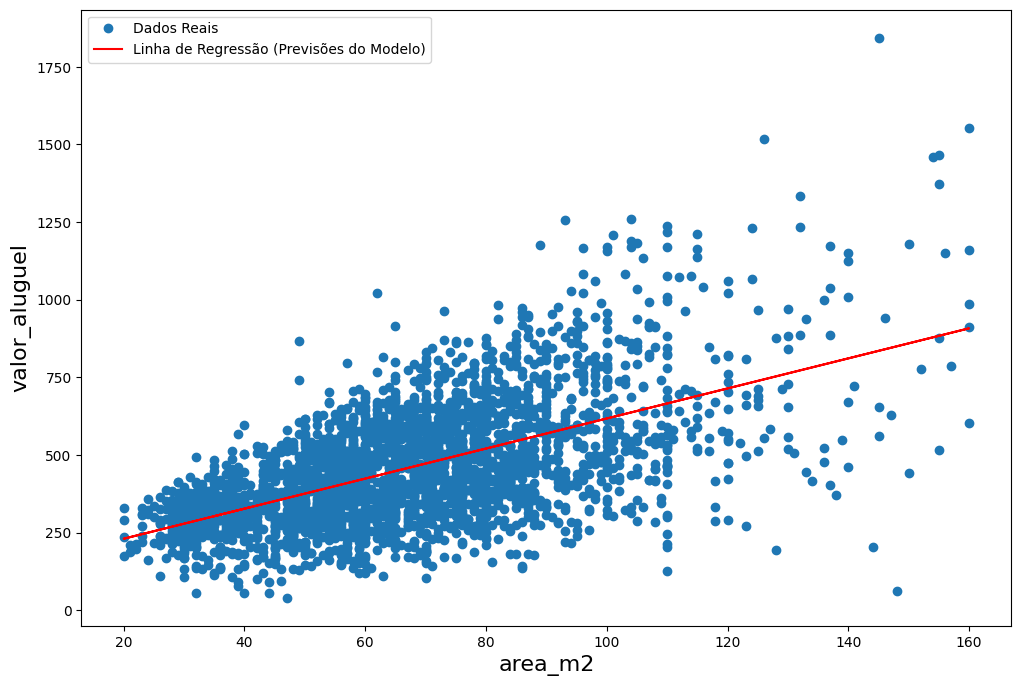

In [16]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size = 16)
plt.plot(X["area_m2"], y, "o", label = "Dados Reais")
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()